In [2]:
!tar -zxvf kNN_Dating.tgz

x kNN_Dating/
x kNN_Dating/datingTestSet.txt


In [3]:

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import numpy as np
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

In [4]:
import numpy as np
def file2matrix(filename):
    """
    函数说明：加载数据集
    parameters:
        fileName - 文件名
    return:
        featureMat - 特征矩阵
        classLabelVector - 类别标签向量(didntLike - 0, smallDoses - 1, largeDoses - 2)
    """
    # basic way to open txt
    data_file   = open(filename)
    data_raw    = data_file.readlines()
    data_amount = len(data_raw)
    
    # Prepare containers for pre-processed data
    featureMat = np.ones((data_amount, 3))
    classLabelVector = []
    
    # Pre-process
    line = 0
    for instance in data_raw:
        instance = instance.strip()
        instance = instance.split("\t")
        featureMat[line, :] = instance[0:3]
        
        if instance[3] == 'largeDoses':
            classLabelVector.append(2)
        if instance[3] == 'smallDoses':
            classLabelVector.append(1)
        if instance[3] == 'didntLike':
            classLabelVector.append(0)
        line += 1
    return featureMat, classLabelVector

In [5]:
def showdatas(datingDataMat, datingLabels):
    """
    函数说明：绘制散点图
    parameters:
        datingDataMat - 特征矩阵
        datingLabels - 类别标签向量(didntLike - 0, smallDoses - 1, largeDoses - 2)
    """
    # 设置子图
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(18, 12))
    # 设置颜色
    colors = []
    for i in datingLabels:
        if i == 0:
            colors.append('black')
        if i == 1:
            colors.append('orange')
        if i == 2:
            colors.append('red')
    axs[0].scatter(x = datingDataMat[:,0], color=colors, y = datingDataMat[:,1], s=15)
    axs[0].set_xlabel('Number of frequent flight miles earned per year')
    axs[0].set_ylabel('Percentage of time spent playing video games')
    
    axs[1].scatter(x = datingDataMat[:,0], color=colors, y = datingDataMat[:,2], s=15)
    axs[1].set_xlabel('Number of frequent flight miles earned per year')
    axs[1].set_ylabel('Liters of ice cream consumed per week')
    
    axs[2].scatter(x = datingDataMat[:,2], color=colors, y = datingDataMat[:,1], s=15)
    axs[2].set_xlabel('Liters of ice cream consumed per week')
    axs[2].set_ylabel('Percentage of time spent playing video games')
    
    
    didntLike = mlines.Line2D([],[],color='black', marker='.', markersize=6, label='didntLike')
    smallDoses = mlines.Line2D([],[],color='orange', marker='.', markersize=6, label='smallDoses')
    largeDoses = mlines.Line2D([],[],color='red', marker='.', markersize=6, label='largeDoses')
    
    axs[0].legend(handles=[didntLike, smallDoses, largeDoses])
    axs[1].legend(handles=[didntLike, smallDoses, largeDoses])
    axs[2].legend(handles=[didntLike, smallDoses, largeDoses])

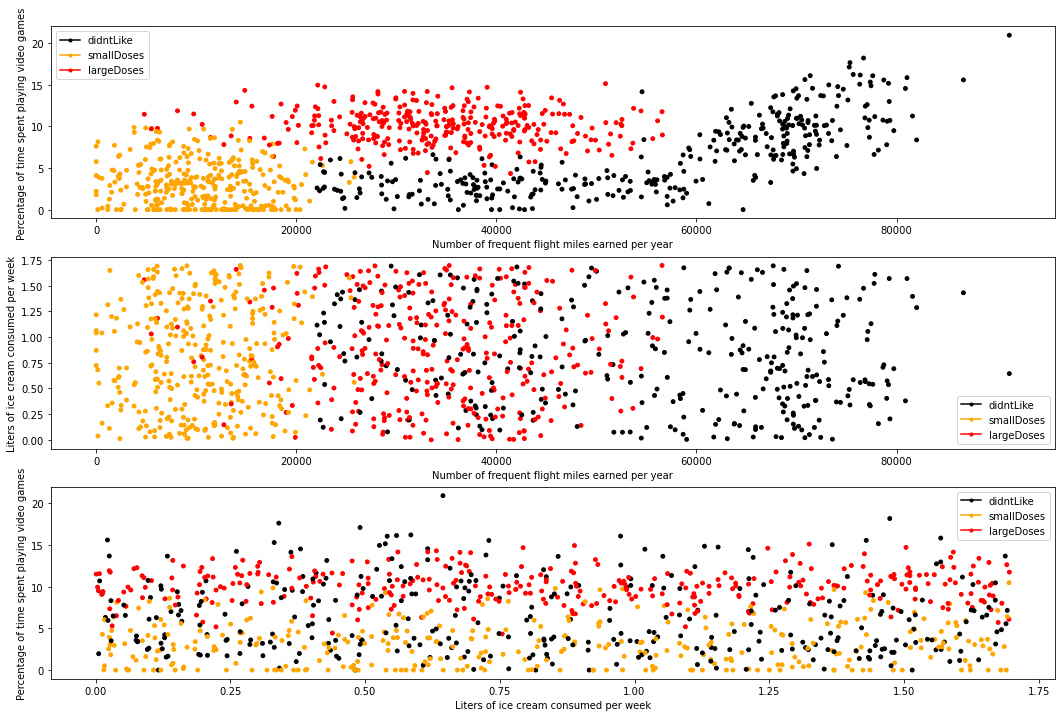

In [6]:
%matplotlib inline
if __name__ == '__main__':
    filename = "kNN_Dating/datingTestSet.txt"
    datingDataMat, datingLabels = file2matrix(filename)
    showdatas(datingDataMat, datingLabels)